In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

files = os.listdir("./")

csvs = []

for file in files:
    if ".csv" in file:
        csvs.append(file)

In [2]:
neon_datasets = []
cdc_datasets = []

for csv in csvs:
    
    if re.match("\w\w_", csv):
        neon_datasets.append(csv)

    elif "CDC" in csv:
        cdc_datasets.append(csv)
    

In [3]:
cdc_datasets

pneu = []
sal = []
camp = []

for cdc in cdc_datasets:
    if "pneu" in cdc:
        pneu.append(cdc)
    elif "sal" in cdc:
        sal.append(cdc)
    elif "camp" in cdc:
        camp.append(cdc)

In [4]:
wind = []
cellcounts = []
group = []
mam = []
pres = []
short = []
temp = []

for neon in neon_datasets:
    if "wind" in neon:
        wind.append(neon)
    elif "cellCounts" in neon:
        cellcounts.append(neon)
    elif "mammals" in neon:
        mam.append(neon)
    elif "pres" in neon:
        pres.append(neon)
    elif "short" in neon:
        short.append(neon)
    elif "temp" in neon:
        temp.append(neon)
    elif "Group" in neon:
        group.append(neon)

In [5]:
for dataset in pneu:
    print(pd.read_csv(dataset))
    
    #rint(dataset)

    Unnamed: 0  mmwr_year  bin  mmwr_week  invasive_pneumococcal     x  \
0            0       2014    1         10                   39.0    10   
1            1       2014    2         26                  113.0    26   
2            2       2014    3         42                  105.0    42   
3            3       2014    4         58                  106.0    58   
4            4       2014    5         74                  110.0    74   
..         ...        ...  ...        ...                    ...   ...   
88          88       2021   11        170                   45.0  1426   
89          89       2021   12        186                   51.0  1442   
90          90       2021   13        202                   33.0  1458   
91          91       2022    1         10                   13.0  1474   
92          92       2022    2          5                   13.0   371   

    COVID1  COVID2  COVID3   modifier  covid_adjusted  scaled_v3  
0        0       0       0  -0.000000       

In [6]:
states = []
ids = []

for dataset in pneu:
    states.append(dataset.split(sep = "_")[0])
for dataset in mam:
    ids.append(dataset.split(sep="_")[0])



In [7]:
import numpy as np

print(list(np.sort(states)))
print()

['ALABAMA', 'ARIZONA', 'COLORADO', 'FLORIDA', 'GEORGIA', 'KANSAS', 'MASSACHUSETTS', 'NORTH DAKOTA', 'OKLAHOMA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VIRGINIA', 'WISCONSIN', 'WYOMING']



In [8]:
datasets_state = {}
sorted_ids = list(np.sort(ids))
i = 0 
for state in list(np.sort(states)):
    state_cur = state
    id_cur = sorted_ids[i]
    id_cur = id_cur + "_"

    print(state_cur)
    print(id_cur)

    list_of_datasets = []

    for dataset in csvs:
        if state_cur in dataset or id_cur in dataset[0:3]:
            list_of_datasets.append(dataset)

    datasets_state.update({state:list_of_datasets})

    i += 1

ALABAMA
AL_
ARIZONA
AZ_
COLORADO
CO_
FLORIDA
FL_
GEORGIA
GA_
KANSAS
KS_
MASSACHUSETTS
MA_
NORTH DAKOTA
ND_
OKLAHOMA
OK_
TENNESSEE
TN_
TEXAS
TX_
UTAH
UT_
VIRGINIA
VA_
WISCONSIN
WI_
WYOMING
WY_


In [9]:
for state in datasets_state:
    print(datasets_state[state])

['ALABAMA_CDC_sal.csv', 'AL_wss_daily_temp.csv', 'ALABAMA_CDC_pneu.csv', 'AL_wss_daily_pres.csv', 'AL_030.01D.wss_daily_wind.csv', 'AL_amc_cellCounts.csv', 'ALABAMA_CDC_camp.csv', 'AL_mammals.csv', 'AL_wss_daily_shortRad.csv', 'AL_mga_swGroupAbundances.csv']
['AZ_wss_daily_shortRad.csv', 'ARIZONA_CDC_pneu.csv', 'ARIZONA_CDC_sal.csv', 'AZ_amc_cellCounts.csv', 'AZ_wss_daily_pres.csv', 'AZ_wss_daily_temp.csv', 'AZ_mga_swGroupAbundances.csv', 'ARIZONA_CDC_camp.csv', 'AZ_mammals.csv', 'AZ_030.01D.wss_daily_wind.csv']
['COLORADO_CDC_camp.csv', 'CO_mammals.csv', 'CO_wss_daily_shortRad.csv', 'CO_wss_daily_temp.csv', 'CO_mga_swGroupAbundances.csv', 'CO_030.01D.wss_daily_wind.csv', 'COLORADO_CDC_sal.csv', 'CO_amc_cellCounts.csv', 'COLORADO_CDC_pneu.csv']
['FLORIDA_CDC_pneu.csv', 'FL_030.01D.wss_daily_wind.csv', 'FL_wss_daily_temp.csv', 'FL_wss_daily_pres.csv', 'FLORIDA_CDC_sal.csv', 'FL_mammals.csv', 'FL_amc_cellCounts.csv', 'FL_mga_swGroupAbundances.csv', 'FLORIDA_CDC_camp.csv', 'FL_wss_daily_s

In [10]:
states_dict = {}
i = 0
for state in list(np.sort(states)):
    cur_state = state
    cur_id = sorted_ids[i]

    states_dict.update({cur_state:cur_id})

    i += 1

In [11]:
all_dfs = {}

for state in datasets_state:
    df_list = []
    for df in datasets_state[state]:

        imported = pd.read_csv(df)

        if "swGroupAbundances" in df:
            imported = imported.rename(columns = {"ratio":"fungal_to_bacterial_ratio"})
        elif "cellCounts" in df:
            imported = imported.rename(columns = {"ratio":"Cells_unit_volume"})

        df_list.append(imported)

    all_dfs.update({state:df_list})

In [12]:
all_dfs["ALABAMA"]

joined_dfs = {}

for state in all_dfs:
    i = 0
    for df in all_dfs[state]:
        df = df.drop("Unnamed: 0", axis = 1)
        if "mmwr_year" in list(df.columns):
            df = df.rename(columns = {"mmwr_year":"year"})

        if "invasive_pneumococcal" in list(df.columns):
            df = df.rename(columns = {"scaled_v3":"invasive_pneumococcal_scaled"})
            df = df[["year", "bin", "invasive_pneumococcal_scaled"]]

        elif "campylobacteriosis" in list(df.columns):
            df = df.rename(columns = {"scaled_v3":"campylobacteriosis_scaled"})
            df = df[["year","bin","campylobacteriosis_scaled"]]

        elif "salmonellosis" in list(df.columns):
            df = df.rename(columns = {"scaled_v3":"salmonellosis_scaled"})
            df = df[["year", "bin", "salmonellosis_scaled"]]

        if i == 0:
            save_df = df
            i += 1
        else:
            save_df = pd.merge(save_df, df, left_on = ["year", "bin"], right_on = ["year", "bin"], how = "outer")

    joined_dfs.update({state:save_df})

In [13]:
for state in joined_dfs:
    print(joined_dfs[state].columns)

Index(['year', 'bin', 'salmonellosis_scaled', 'wssTempTripleMean',
       'wssTempTripleMinimum', 'wssTempTripleMaximum', 'wssTempTripleVariance',
       'invasive_pneumococcal_scaled', 'wssStaPresMean', 'wssStaPresMinimum',
       'wssStaPresMaximum', 'wssStaPresVariance', 'wssWindSpeedMean',
       'wssWindSpeedMinimum', 'wssWindSpeedMaximum', 'wssWindSpeedVariance',
       'Cells_unit_volume', 'campylobacteriosis_scaled', 'trap_code', 'weight',
       'wssShortRadMean', 'wssShortRadMinimum', 'wssShortRadMaximum',
       'wssShortRadVariance', 'fungal_to_bacterial_ratio'],
      dtype='object')
Index(['year', 'bin', 'wssShortRadMean', 'wssShortRadMinimum',
       'wssShortRadMaximum', 'wssShortRadVariance',
       'invasive_pneumococcal_scaled', 'salmonellosis_scaled',
       'Cells_unit_volume', 'wssStaPresMean', 'wssStaPresMinimum',
       'wssStaPresMaximum', 'wssStaPresVariance', 'wssTempTripleMean',
       'wssTempTripleMinimum', 'wssTempTripleMaximum', 'wssTempTripleVariance',


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.svm import SVR
import seaborn as sns
from collections import defaultdict

diseases = ["campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"]

info_camp = defaultdict(list)
info_pneu = defaultdict(list)
info_sal = defaultdict(list)

reg_stats_err_camp = defaultdict(list)
reg_stats_coef_camp = defaultdict(list)
reg_stats_r2_camp = defaultdict(list)

reg_stats_err_pneu = defaultdict(list)
reg_stats_coef_pneu = defaultdict(list)
reg_stats_r2_pneu = defaultdict(list)

reg_stats_err_sal = defaultdict(list)
reg_stats_coef_sal = defaultdict(list)
reg_stats_r2_sal = defaultdict(list)

reg_stats = [[reg_stats_err_camp,reg_stats_r2_camp], [reg_stats_err_pneu,reg_stats_r2_pneu], [reg_stats_err_sal,reg_stats_r2_sal]]

cart_stats_err_camp = defaultdict(list)
cart_stats_err_pneu = defaultdict(list)
cart_stats_err_sal = defaultdict(list)

cart_stats = [cart_stats_err_camp, cart_stats_err_pneu, cart_stats_err_sal]

rbf_stats_err_camp = defaultdict(list)
rbf_stats_err_pneu = defaultdict(list)
rbf_stats_err_sal = defaultdict(list)

rbf_stats = [rbf_stats_err_camp, rbf_stats_err_pneu, rbf_stats_err_sal]

lin_stats_err_camp = defaultdict(list)
lin_stats_err_pneu = defaultdict(list)
lin_stats_err_sal = defaultdict(list)

lin_stats = [lin_stats_err_camp, lin_stats_err_pneu, lin_stats_err_sal]

poly_stats_err_camp = defaultdict(list)
poly_stats_err_pneu = defaultdict(list)
poly_stats_err_sal = defaultdict(list)

poly_stats = [poly_stats_err_camp, poly_stats_err_pneu, poly_stats_err_sal]

for state in joined_dfs:
    exclude_list = []

    # calculate data metrics
    for col in list(joined_dfs[state].columns):
        temp_df_full = joined_dfs[state]

        if col not in ["year","bin", "campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"]:

            temp_df = temp_df_full[["year","bin", "campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"] + [col]]

            temp_df = temp_df.dropna()

            if len(temp_df) < 30:
                exclude_list.append(col)
            # if greater than 30, run linear models
            else:
                # set X variables

                z = 0

                for disease in diseases:
                    errors = []

                    temp_df = temp_df_full[["year","bin", "campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"] + [col]]

                    temp_df = temp_df.dropna()

                    X = temp_df[[col]]
                    
                    y = temp_df[[disease]]

                    y = np.ravel(y)
                    
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

                    model = LinearRegression().fit(X_train, y_train)

                    cart = tree.DecisionTreeRegressor().fit(X_train, y_train)

                    svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(X_train,y_train)
                    svr_lin = SVR(kernel="linear", C=100, gamma="auto").fit(X_train,y_train)
                    svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train,y_train)

                    y_pred = model.predict(X_test)

                    y_pred_cart = cart.predict(X_test)

                    y_pred_rbf = svr_rbf.predict(X_test)

                    y_pred_lin = svr_lin.predict(X_test)

                    y_pred_poly = svr_poly.predict(X_test)

                    error = mean_absolute_error(y_test, y_pred)

                    error_cart = mean_absolute_error(y_test, y_pred_cart)

                    error_rbf = mean_absolute_error(y_test, y_pred_rbf)

                    error_lin = mean_absolute_error(y_test, y_pred_lin)

                    error_poly = mean_absolute_error(y_test, y_pred_poly)

                    r2 = r2_score(y_test, y_pred)

                    coefs = model.coef_

                    extra_cols = []

                    errors.append([error, error_cart, error_rbf, error_lin, error_poly])

                    reg_stats[z][0][col].append(error)
                    reg_stats[z][1][col].append(r2)
                    cart_stats[z][col].append(error_cart)
                    lin_stats[z][col].append(error_lin)
                    poly_stats[z][col].append(error_poly)
                    rbf_stats[z][col].append(error_rbf)

                    for col2 in list(joined_dfs[state].columns):
                        if col2 not in ["year","bin", "campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"] + [col]:
                            extra_cols.append(col2)

                            temp_df = temp_df_full[["year","bin", "campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"] + [col] + extra_cols]

                            temp_df = temp_df.dropna()

                            if len(temp_df) < 30:
                                extra_cols.pop()
                                continue

                            y = temp_df[[disease]]

                            y = np.ravel(y)

                            X = temp_df[[col] + extra_cols]

                            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

                            model = LinearRegression().fit(X_train, y_train)

                            cart = tree.DecisionTreeRegressor().fit(X_train, y_train)

                            svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(X_train,y_train)
                            svr_lin = SVR(kernel="linear", C=100, gamma="auto").fit(X_train,y_train)
                            svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train,y_train)

                            y_pred = model.predict(X_test)

                            y_pred_cart = cart.predict(X_test)

                            y_pred_rbf = svr_rbf.predict(X_test)

                            y_pred_lin = svr_lin.predict(X_test)

                            y_pred_poly = svr_poly.predict(X_test)

                            error = mean_absolute_error(y_test, y_pred)

                            error_cart = mean_absolute_error(y_test, y_pred_cart)

                            error_rbf = mean_absolute_error(y_test, y_pred_rbf)

                            error_lin = mean_absolute_error(y_test, y_pred_lin)

                            error_poly = mean_absolute_error(y_test, y_pred_poly)

                            r2 = r2_score(y_test, y_pred)

                            coefs = model.coef_

                            new_error = [error, error_cart, error_rbf, error_lin, error_lin]

                            if min(new_error) > min(errors[-1]):
                                extra_cols.pop()
                                continue
                            else:
                                experiment_name = "_".join([col] + extra_cols)

                                reg_stats[z][0][experiment_name].append(error)
                                reg_stats[z][1][experiment_name].append(r2)
                                cart_stats[z][experiment_name].append(error_cart)
                                lin_stats[z][experiment_name].append(error_lin)
                                poly_stats[z][experiment_name].append(error_poly)
                                rbf_stats[z][experiment_name].append(error_rbf)

                                errors.append(new_error)
                    z += 1

    corr = joined_dfs[state].corr()
    corr = corr.sort_values(["campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"])
    #sns.heatmap(corr[["campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"]], 
                #xticklabels=corr[["campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"]].columns.values,
                #yticklabels=corr.columns.values)
    #plt.show()

    for col in list(corr.columns):
        if col not in ["year","bin"] + exclude_list:

            for disease in diseases:
                if disease == col:
                    continue

                if disease == diseases[0]:

                    value = corr.loc[disease, col]
                    info_camp[col].append(value)

                elif disease == diseases[1]:
                    value = corr.loc[disease, col]
                    info_pneu[col].append(value)

                elif disease == diseases[2]:
                    value = corr.loc[disease, col]
                    info_sal[col].append(value)

            


In [47]:


pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(info_sal).items()]  )).to_csv("corrs_sal.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(info_camp).items()]  )).to_csv("corrs_camp.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(info_pneu).items()]  )).to_csv("corrs_pneu.csv")

TypeError: 'list' object is not callable

In [53]:
i = 0
for state in joined_dfs:
    if i == 0:
        final_df = joined_dfs[state]
        i += 1
    else:
        final_df = pd.concat([final_df, joined_dfs[state]])



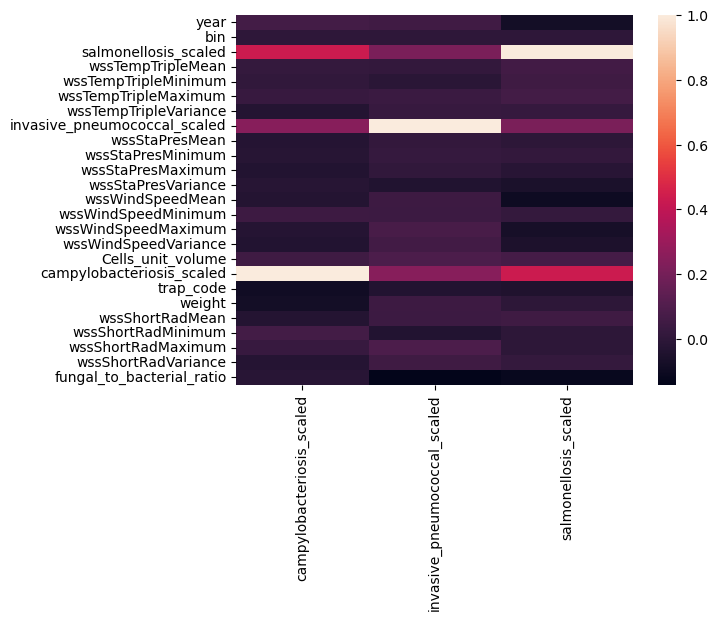

In [55]:
final_df = final_df.drop_duplicates(keep = "first")

sns.heatmap(final_df.corr()[["campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"]], 
                xticklabels=final_df.corr()[["campylobacteriosis_scaled", "invasive_pneumococcal_scaled", "salmonellosis_scaled"]].columns.values,
                yticklabels=final_df.corr().columns.values)
plt.savefig("heatmap.jpeg", dpi = 500)

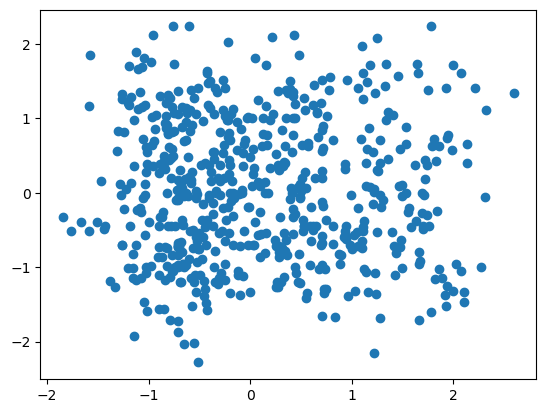

In [152]:
temp_df = final_df[["weight", "salmonellosis_scaled"]]

temp_df = temp_df.dropna()

plt.scatter(temp_df["weight"], temp_df["salmonellosis_scaled"])
plt.show()

In [151]:
final_df.columns

Index(['year', 'bin', 'salmonellosis_scaled', 'wssTempTripleMean',
       'wssTempTripleMinimum', 'wssTempTripleMaximum', 'wssTempTripleVariance',
       'invasive_pneumococcal_scaled', 'wssStaPresMean', 'wssStaPresMinimum',
       'wssStaPresMaximum', 'wssStaPresVariance', 'wssWindSpeedMean',
       'wssWindSpeedMinimum', 'wssWindSpeedMaximum', 'wssWindSpeedVariance',
       'Cells_unit_volume', 'campylobacteriosis_scaled', 'trap_code', 'weight',
       'wssShortRadMean', 'wssShortRadMinimum', 'wssShortRadMaximum',
       'wssShortRadVariance', 'fungal_to_bacterial_ratio'],
      dtype='object')

In [76]:

pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(reg_stats[0][0])).items()]  )).to_csv("reg_camp.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(reg_stats[1][0])).items()]  )).to_csv("reg_pneu.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(reg_stats[2][0])).items()]  )).to_csv("reg_sal.csv")

In [42]:
pd.DataFrame([(k,list(v)) for k,v in reg_stats[0][0].items()])

,0,1
0,wssTempTripleMean,"[0.6935790259805533, 0.5148601848846692, 0.654..."
1,wssTempTripleMean_wssStaPresMean,[0.68468395100025]
2,wssTempTripleMean_wssStaPresMean_wssStaPresMin...,[0.6520038744082386]
3,wssTempTripleMean_wssStaPresMean_wssStaPresMin...,[0.6508497447986159]
4,wssTempTripleMinimum,"[0.7598011122149947, 0.842888281786848, 0.6290..."
...,...,...
409,wssTempTripleVariance_wssWindSpeedMean_wssWind...,[0.9644570603795084]
410,wssTempTripleVariance_wssWindSpeedMean_wssWind...,[0.8203380437023097]
411,wssTempTripleVariance_wssWindSpeedMean_wssWind...,[0.791658094431703]
412,0,[]


In [77]:
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(reg_stats[0][1])).items()]  )).to_csv("fit_camp.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(reg_stats[1][1])).items()]  )).to_csv("fit_pneu.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(reg_stats[2][1])).items()]  )).to_csv("fit_sal.csv")

In [78]:
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(cart_stats[0])).items()]  )).to_csv("cart_camp.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(cart_stats[1])).items()]  )).to_csv("cart_pneu.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(cart_stats[2])).items()]  )).to_csv("cart_sal.csv")

In [79]:
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(rbf_stats[0])).items()]  )).to_csv("rbf_camp.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(rbf_stats[1])).items()]  )).to_csv("rbf_pneu.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(rbf_stats[2])).items()]  )).to_csv("rbf_sal.csv")

In [80]:
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(lin_stats[0])).items()]  )).to_csv("lin_camp.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(lin_stats[1])).items()]  )).to_csv("lin_pneu.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(lin_stats[2])).items()]  )).to_csv("lin_sal.csv")

In [81]:
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(poly_stats[0])).items()]  )).to_csv("pol_camp.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(poly_stats[1])).items()]  )).to_csv("pol_pneu.csv")
pd.DataFrame.from_dict(dict( [(k,pd.Series(v)) for k,v in dict(dict(poly_stats[2])).items()]  )).to_csv("pol_sal.csv")